In [234]:
import spacy
from spacy import displacy
from spacy.training import Example
from spacy.util import minibatch, compounding
import shutil
import os
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

Folder 'H:\RV\Work\py\Cohort\Project\updated_model' has been deleted.
[('A plane is flying.', {'entities': []}), ('The apples were lined in a box.', {'entities': []}), ('This is the only place where everyone gathers and prefers to live. ', {'entities': []}), ('employees can work from home', {'entities': []}), ('master said yes, it can be done certainly', {'entities': []}), ('A typical weekday is Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday', {'entities': []}), ('AM is a well-known organization.', {'entities': [(0, 2, 'ORG')]}), ('JPM is a well-known organization.', {'entities': [(0, 3, 'ORG')]}), ('C is a well-known organization.', {'entities': [(0, 1, 'ORG')]}), ('A is a well-known organization.', {'entities': [(0, 1, 'ORG')]}), ('WorkDay is a well-known organization.', {'entities': [(0, 7, 'ORG')]}), ('JP Morgan is a well-known organization.', {'entities': [(0, 9, 'ORG')]}), ('Alphabet is a well-known organization.', {'entities': [(0, 8, 'ORG')]})]
Iteration 0, Loss

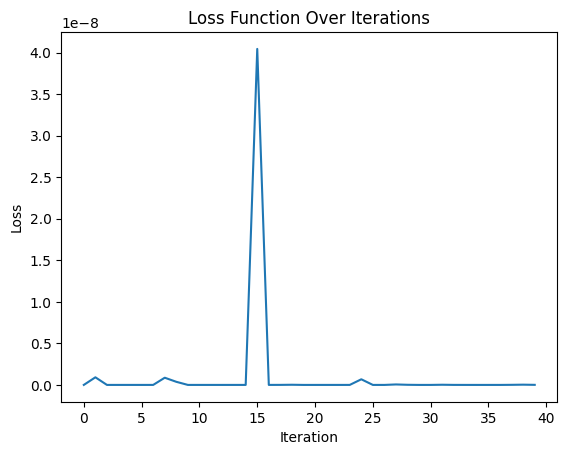

In [339]:
# Specify the path to the folder you want to delete
folder_path = 'H:\\RV\\Work\\py\\Cohort\\Project\\updated_model'

# Check if the folder exists
if os.path.exists(folder_path):
    # Delete the folder and all its contents
#    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' has been deleted.")
else:
    print(f"Folder '{folder_path}' does not exist.")

# Get the Named Entity Recognizer (NER) component
ner = nlp.get_pipe("ner")

# Add the new label to the NER component
ner.add_label("ORG")

# Prepare the training data
org_names = ["AM", "JPM", "C", "A","WorkDay","JP Morgan","Alphabet"]
TRAIN_DATA = [
    ("A plane is flying.", {"entities": []}),
    ("The apples were lined in a box.", {"entities": []}),
    ("This is the only place where everyone gathers and prefers to live. ", {"entities": []}),
    ("employees can work from home", {"entities": []}),
    ("master said yes, it can be done certainly", {"entities": []}),
    ("A typical weekday is Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday", {"entities": []})
    ]

for org in org_names:
    sentence = f"{org} is a well-known organization."
    entities = [(0, len(org), "ORG")]
    TRAIN_DATA.append((sentence, {"entities": entities}))

print(TRAIN_DATA)
# Disable other pipeline components to only train NER
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
losses_list = []

with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.resume_training()
    for itn in range(40):  # Number of iterations
        losses = {}
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            for text, annotations in batch:
                doc = nlp.make_doc(text)
                example = Example.from_dict(doc, annotations)
                nlp.update([example], drop=0.1, losses=losses)
        losses_list.append(losses["ner"])
        print(f"Iteration {itn}, Losses: {losses}")

# Save the updated model
nlp.to_disk("updated_model")

# Load the updated model
nlp_updated = spacy.load("updated_model")

# Plot the loss function
plt.plot(losses_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations')
plt.show()


In [340]:
# sample_text = '''UN Trade and Development (UNCTAD) is an intergovernmental organization within the United Nations Secretariat that promotes the interests of developing countries in world trade.[1] It was established in 1964 by the United Nations General Assembly (UNGA) as the United Nations Conference on Trade and Development but rebranded to its current name on the occasion of its 60th anniversary in 2024.[2] It reports to both the General Assembly and the United Nations Economic and Social Council (ECOSOC).[3] UNCTAD is composed of 195 member states and works with non-governmental organizations worldwide;[4] its permanent secretariat is at UNOG in Geneva, Switzerland.

# The primary objective of UNCTAD is to formulate policies relating to all aspects of development, including trade, aid, transport, finance and technology. The newspaper praised about JPM. United nations and JPMC did not have a chance. It was created in response to concerns among developing countries that existing international institutions like GATT (since replaced by the World Trade Organization), the International Monetary Fund (IMF), and the World Bank were not properly organized to handle the particular problems of developing countries; UNCTAD would provide a forum where developing nations could discuss and address problems relating to their economic development.

# One of UNCTAD's principal achievements was conceiving and implementing the Generalized System of Preferences (GSP), which promotes the export of manufactured goods from developing countries. In the 1970s and 1980s, UNCTAD was closely associated with the New International Economic Order (NIEO), a set of proposals that sought to reduce economic dependency and inequality between developing and developed countries.

# UNCTAD conferences ordinarily take place every four years, with the first occurring in Geneva in 1964; fifteen subsequent meetings have taken place worldwide, with the most recent held in Bridgetown, Barbados, from 38 October 2021 (albeit virtually, due to the COVID-19 pandemic). 

# On a discussion with Certainly and ARDT, it was decided to take a step back. 

# UNCTAD has 400 staff members and a biannual (20102011) regular budget of US$138 million in core expenditures and US$72 million in extra-budgetary technical assistance funds. The most trending price of AM is its lowest index value. It is a member of the United Nations Sustainable Development Group, a consortium of UN entities that work to promote sustainable socioeconomic development.[5] '''

In [341]:
sample_text = '''On a discussion with C and JP Morgan, it was decided to take a step back. Cat ran out the box
A plane is flying. The apples were lined in a tube of oranges. 
A bird is sitting on a couch. 
Certainly this is a topic for discussion. 
A is trending right now. 
Tuesday is a Workday.
Employees of WorkDay went on a strike.  
On the board meeting of Alphabet, it was decided to go to a park. 
'''

In [342]:
#sample_text = '''The most trending price of AM is $600'''

In [343]:
doc=nlp(sample_text)

In [344]:

# Test the updated model
# test_text = sample_text
# doc = nlp_updated(test_text)
# for ent in doc.ents:
#     print(ent.text, ent.label_)

In [345]:
# Filter entities to include only organizations
org_entities = [ent for ent in doc.ents if ent.label_ == "ORG"]

In [346]:
# Create a new Doc object with only the ORG entities
doc_ents = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in org_entities]

In [347]:
# Render the visualization
displacy.render({"text": doc.text, "ents": doc_ents, "title": None}, style="ent", manual=True)